import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
# HyperParameter Tuning

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [44]:
from yellowbrick.datasets import load_credit

X = load_credit()[0]
y = load_credit()[1]

In [45]:
X.head()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3000)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [50]:
from sklearn.model_selection import cross_val_score, KFold

In [51]:
cross_val_score(model, X_train , y_train, scoring='roc_auc')

array([0.73616326, 0.7116514 , 0.70723116, 0.70950817, 0.73383078])

In [52]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.7283728056094502

# Grid Search:

![grid_vs_random.png](grid_vs_random.png)

Grid search just keeps testing all combinations in your `search space` until you obtain the best possible result.

In [59]:
for parameter in [0.1,0.2,0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6]:
    
    #print(parameter) 
    model = LogisticRegression(C=parameter)
    
    print(cross_val_score(model, 
                    X_train, 
                    y_train, 
                    cv=KFold(5, shuffle=True), 
                    scoring='roc_auc'))
    
    

[0.71871263 0.72771395 0.716017   0.71917046 0.71690135]
[0.73274948 0.71814384 0.71552533 0.72225964 0.71252483]
[0.71466414 0.7281316  0.72018406 0.72051602 0.71819124]
[0.72034582 0.70625216 0.71870822 0.72913095 0.72784405]
[0.71673335 0.71773331 0.72267983 0.72809374 0.71595683]
[0.73531876 0.70368225 0.70851762 0.73672655 0.71830124]
[0.70199863 0.72623329 0.71354469 0.73941029 0.72038638]
[0.72809884 0.71490834 0.71553913 0.72804108 0.71422092]
[0.72749566 0.71861427 0.73370132 0.71206492 0.70653804]
[0.73525328 0.71788243 0.71355329 0.71133354 0.72373995]


You don't need to loop though, you can use a package for it.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
model

LogisticRegression(C=6)

In [62]:
model = LogisticRegression()

search_space = [{
    'C': [0.1,0.2,0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6]
}]

grid_search = GridSearchCV(model, 
                           search_space, 
                           cv=KFold(3), 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=True)

In [63]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.9s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.2, 0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6]}],
             scoring='roc_auc', verbose=True)

In [64]:
grid_search.best_estimator_

LogisticRegression(C=4)

In [65]:
grid_search.best_params_

{'C': 4}

In [66]:
grid_search.best_score_

0.7197131510302922

## We could search more features in our search space

In [67]:
LogisticRegression()

LogisticRegression()

### And also, we can fix some parameters

In [68]:
model = LogisticRegression(solver='saga')

In [69]:
search_space = [{
    'penalty':['l1','l2'],
    'C': [0.1,0.2,0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6]
}]

grid_search = GridSearchCV(model, 
                           search_space, 
                           cv=KFold(3), 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.8s finished
C:\Users\andreaguiar\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.2, 0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6],
                          'penalty': ['l1', 'l2']}],
             scoring='roc_auc', verbose=True)

In [70]:
grid_search.best_params_

{'C': 0.9, 'penalty': 'l1'}

In [71]:
grid_search.best_score_

0.7196787382648943

In [72]:
grid_search.best_estimator_.predict_proba(X_test)[:, 1]

array([0.14872069, 0.16492517, 0.01421244, ..., 0.14074145, 0.07216105,
       0.02683043])

### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

search_space = [{
    'max_depth':[1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'ccp_alpha': [0.01, 0.02, 0.04, ]
}]

grid_search = GridSearchCV(model, 
                           search_space, 
                           cv=KFold(3), 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 689 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 709 out of 720 | elapsed:   10.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   10.3s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'ccp_alpha': [0.01, 0.02, 0.04],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                          'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40,
                                                45, 50]}],
             scoring='roc_auc', verbose=True)

## Conclusion:

Grid search can be really time consuming.

- Hyperopt: https://towardsdatascience.com/an-introductory-example-of-bayesian-optimization-in-python-with-hyperopt-aae40fff4ff0

# Randomized Search

Instead of taking **all** combinations, what iff we give the algorithm some direction?

In [3]:
from scipy.stats import uniform, gamma, beta, randint
from sklearn.model_selection import RandomizedSearchCV

c:\programas\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\programas\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<IPython.core.display.Javascript object>

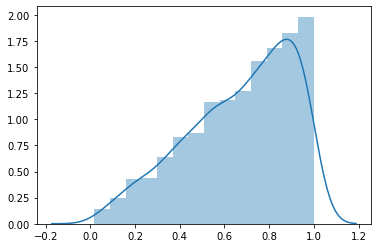

In [4]:
sns.distplot(beta(2, 1, loc=0, scale=1).rvs(size=1000))

<IPython.core.display.Javascript object>

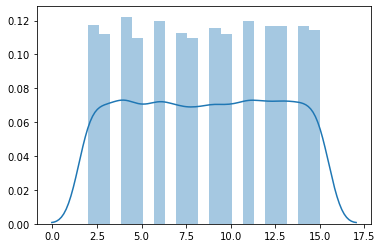

In [5]:
# uniform distrtibution
sns.distplot(randint(2,16).rvs(size=10000))

<IPython.core.display.Javascript object>

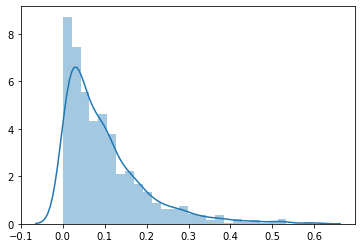

In [6]:
# gamma distribution
sns.distplot(gamma(1, loc=0, scale=0.1).rvs(size=1000))

<IPython.core.display.Javascript object>

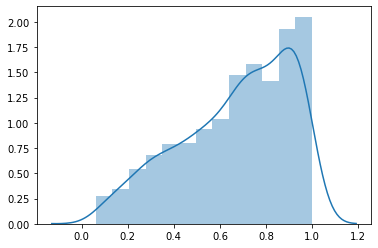

In [7]:
# beta distribution
sns.distplot(beta(2, 1, loc=0, scale=1).rvs(size=1000))

# Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [ ]:
# specify parameters and distributions to sample from

param_dist = {'n_estimators': randint(10,200),
              'max_depth': randint(1,3),
              'ccp_alpha': gamma(1, loc=0, scale=0.1),
              'min_samples_split': randint(10,50),
              'max_features': beta(2, 1, loc=0, scale=1),
             }

n_iter_search = 10000
random_search = RandomizedSearchCV(model, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search, 
                                   verbose=True, 
                                   cv=KFold(n_splits=5, shuffle=True),
                                   scoring='roc_auc',
                                   n_jobs=-1)

random_search.fit(X_train, y_train)